## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(16, 9)})
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# # if you are using google colab for this task you can mount your GoogleDrive as follows:
# from google.colab import drive
# drive.mount('/content/drive/')

# # After running this cell you should enter the authorization code from your Google account

In [3]:
extensions = ('.jpg', '.jpeg')

def count_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(extensions):
                count += 1
    return count

In [4]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './train'
val = './val'
test = './test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = count_images(os.path.join('./train', 'cats')) + count_images(os.path.join('./train', 'dogs'))
# validation set size
nb_validation_samples = count_images(os.path.join('./val', 'cats')) + count_images(os.path.join('./val', 'dogs'))
# test set size
nb_test_samples = count_images(os.path.join('./test', 'cats')) + count_images(os.path.join('./test', 'dogs'))

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [6]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
# 2:
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(32))
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/20


C:\Users\emil_\AppData\Local\Temp\ipykernel_10576\2517733126.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


312/312 [==============================] - 138s 442ms/step - loss: 0.4515 - accuracy: 0.7988 - val_loss: 0.4316 - val_accuracy: 0.8096
Epoch 2/20
312/312 [==============================] - 136s 435ms/step - loss: 0.4106 - accuracy: 0.8231 - val_loss: 0.4278 - val_accuracy: 0.7998
Epoch 3/20
312/312 [==============================] - 136s 437ms/step - loss: 0.3729 - accuracy: 0.8408 - val_loss: 0.3927 - val_accuracy: 0.8240
Epoch 4/20
312/312 [==============================] - 136s 437ms/step - loss: 0.3380 - accuracy: 0.8556 - val_loss: 0.3930 - val_accuracy: 0.8273
Epoch 5/20
312/312 [==============================] - 137s 439ms/step - loss: 0.3046 - accuracy: 0.8740 - val_loss: 0.3568 - val_accuracy: 0.8380
Epoch 6/20
312/312 [==============================] - 136s 435ms/step - loss: 0.2678 - accuracy: 0.8859 - val_loss: 0.3663 - val_accuracy: 0.8409
Epoch 7/20
312/312 [==============================] - 136s 437ms/step - loss: 0.2376 - accuracy: 0.9031 - val_loss: 0.3930 - val_accura

In [11]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_10576\2304885300.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.46%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

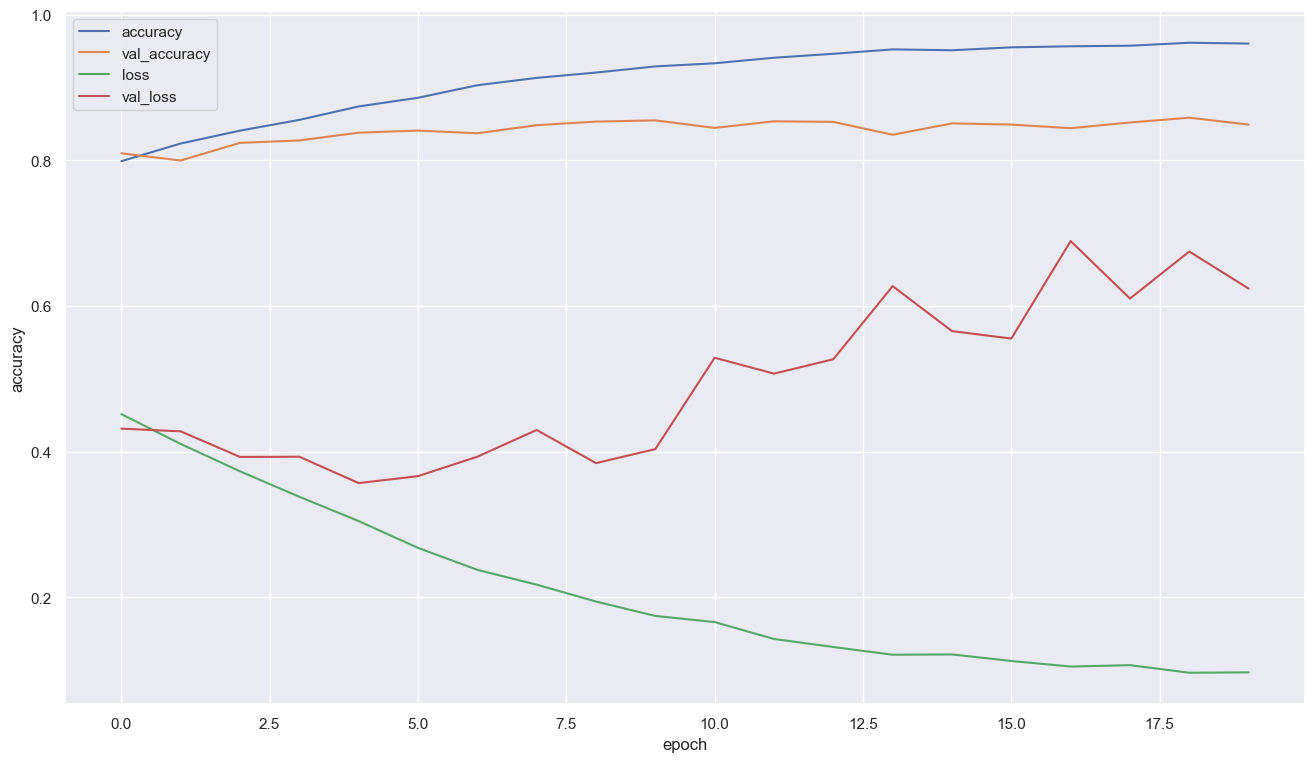

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.xlim(0, 9)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

It can be seen, that after 4th epoch the model starts being overfitted.

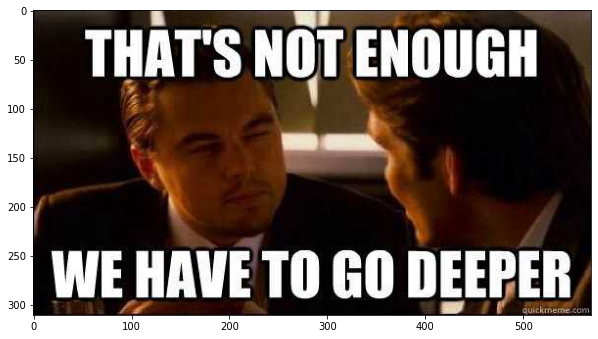

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [14]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [20]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(32))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.2))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                262176    
                                                                 
 activation_7 (Activation)   (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
 activation_8 (Activation)   (None, 1)                

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

E.g., it was like:


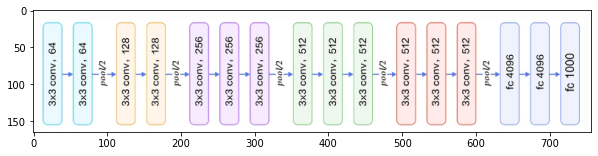

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

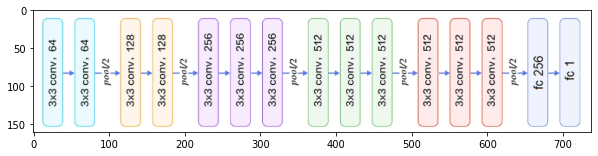

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [22]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5


C:\Users\emil_\AppData\Local\Temp\ipykernel_10576\766054743.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


312/312 [==============================] - 799s 3s/step - loss: 0.5730 - accuracy: 0.6973 - val_loss: 0.4381 - val_accuracy: 0.8289
Epoch 2/5
312/312 [==============================] - 809s 3s/step - loss: 0.3996 - accuracy: 0.8336 - val_loss: 0.3548 - val_accuracy: 0.8627
Epoch 3/5
312/312 [==============================] - 793s 3s/step - loss: 0.3479 - accuracy: 0.8566 - val_loss: 0.3207 - val_accuracy: 0.8750
Epoch 4/5
312/312 [==============================] - 792s 3s/step - loss: 0.3198 - accuracy: 0.8677 - val_loss: 0.3004 - val_accuracy: 0.8861
Epoch 5/5
312/312 [==============================] - 791s 3s/step - loss: 0.2981 - accuracy: 0.8749 - val_loss: 0.2853 - val_accuracy: 0.8923


In [23]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_10576\477001200.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 87.94%


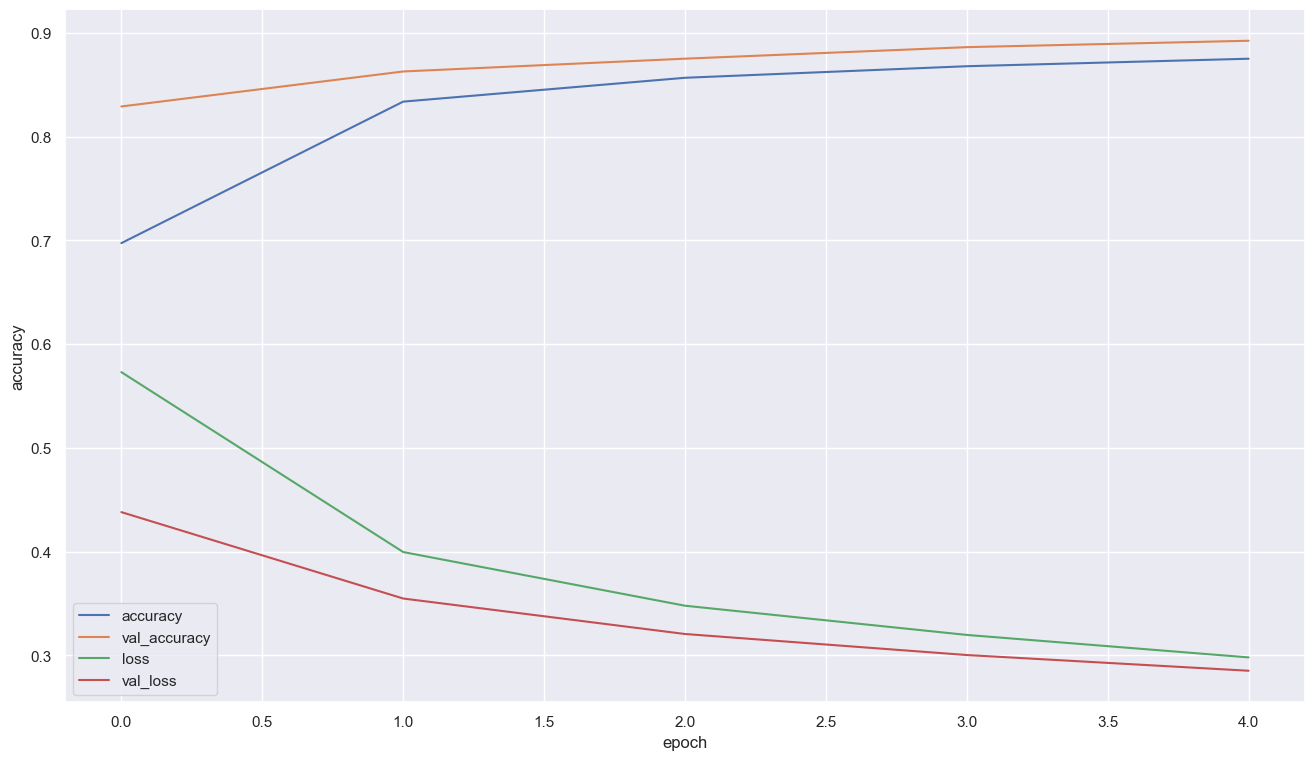

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

## Xception

In [163]:
from keras.applications import Xception

In [126]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

xception_net = Xception(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
xception_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

xception_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_25[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 18, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 18, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_209 (Conv2D)            (None, 9, 9, 728)    186368      ['add_25[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 9, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_31[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 9, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 9, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_34 (Add)                   (None, 9, 9, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_34[0][0]']                 
 on)      

In [127]:
model = Sequential()
model.add(xception_net)

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_12 (Flatten)        (None, 51200)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                1638432   
                                                                 
 activation_994 (Activation)  (None, 32)               0         
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
 activation_995 (Activation)  (None, 1)               

In [128]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

In [129]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5


C:\Users\emil_\AppData\Local\Temp\ipykernel_1992\3034103731.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


312/312 [==============================] - 477s 2s/step - loss: 0.1293 - accuracy: 0.9482 - val_loss: 0.0923 - val_accuracy: 0.9634
Epoch 2/5
312/312 [==============================] - 478s 2s/step - loss: 0.0762 - accuracy: 0.9718 - val_loss: 0.0928 - val_accuracy: 0.9646
Epoch 3/5
312/312 [==============================] - 480s 2s/step - loss: 0.0661 - accuracy: 0.9762 - val_loss: 0.0868 - val_accuracy: 0.9634
Epoch 4/5
312/312 [==============================] - 488s 2s/step - loss: 0.0581 - accuracy: 0.9795 - val_loss: 0.0885 - val_accuracy: 0.9655
Epoch 5/5
312/312 [==============================] - 479s 2s/step - loss: 0.0509 - accuracy: 0.9820 - val_loss: 0.0843 - val_accuracy: 0.9642


In [130]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_1992\477001200.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 96.19%


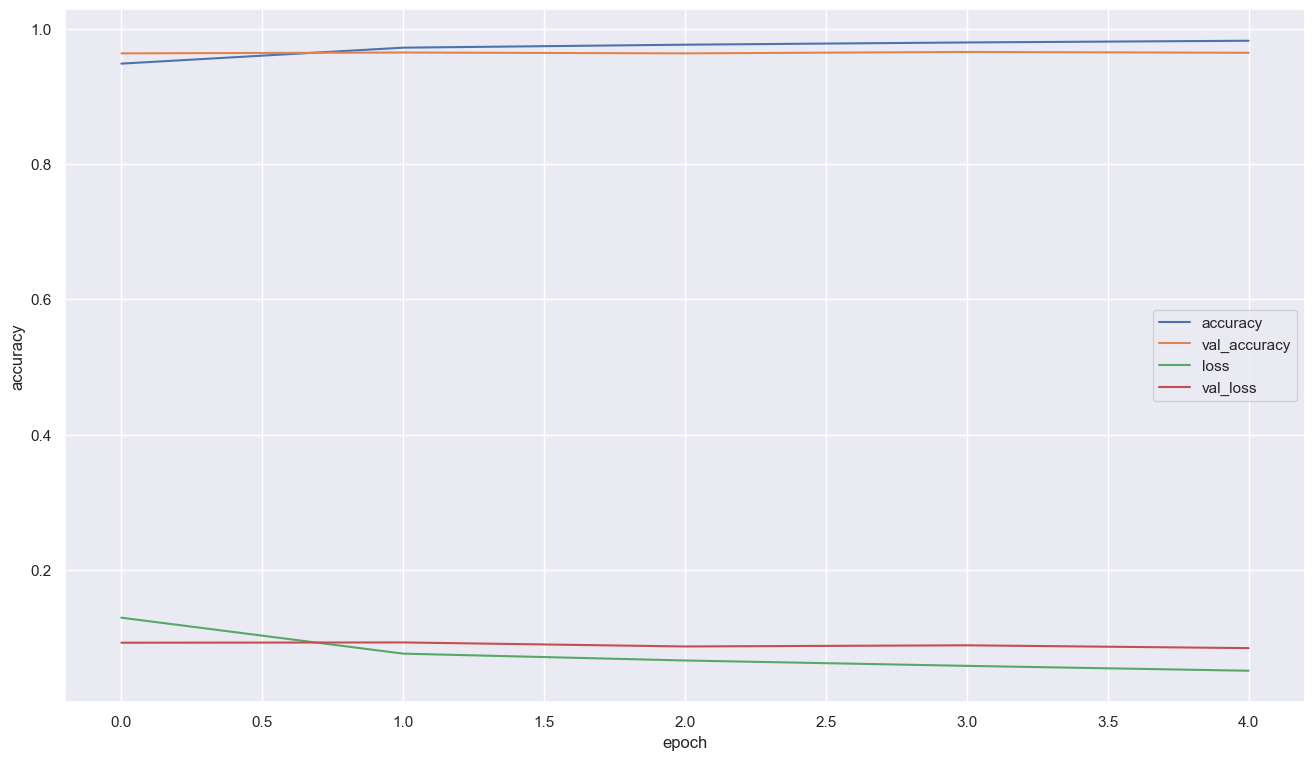

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

## Using custom images
Cat
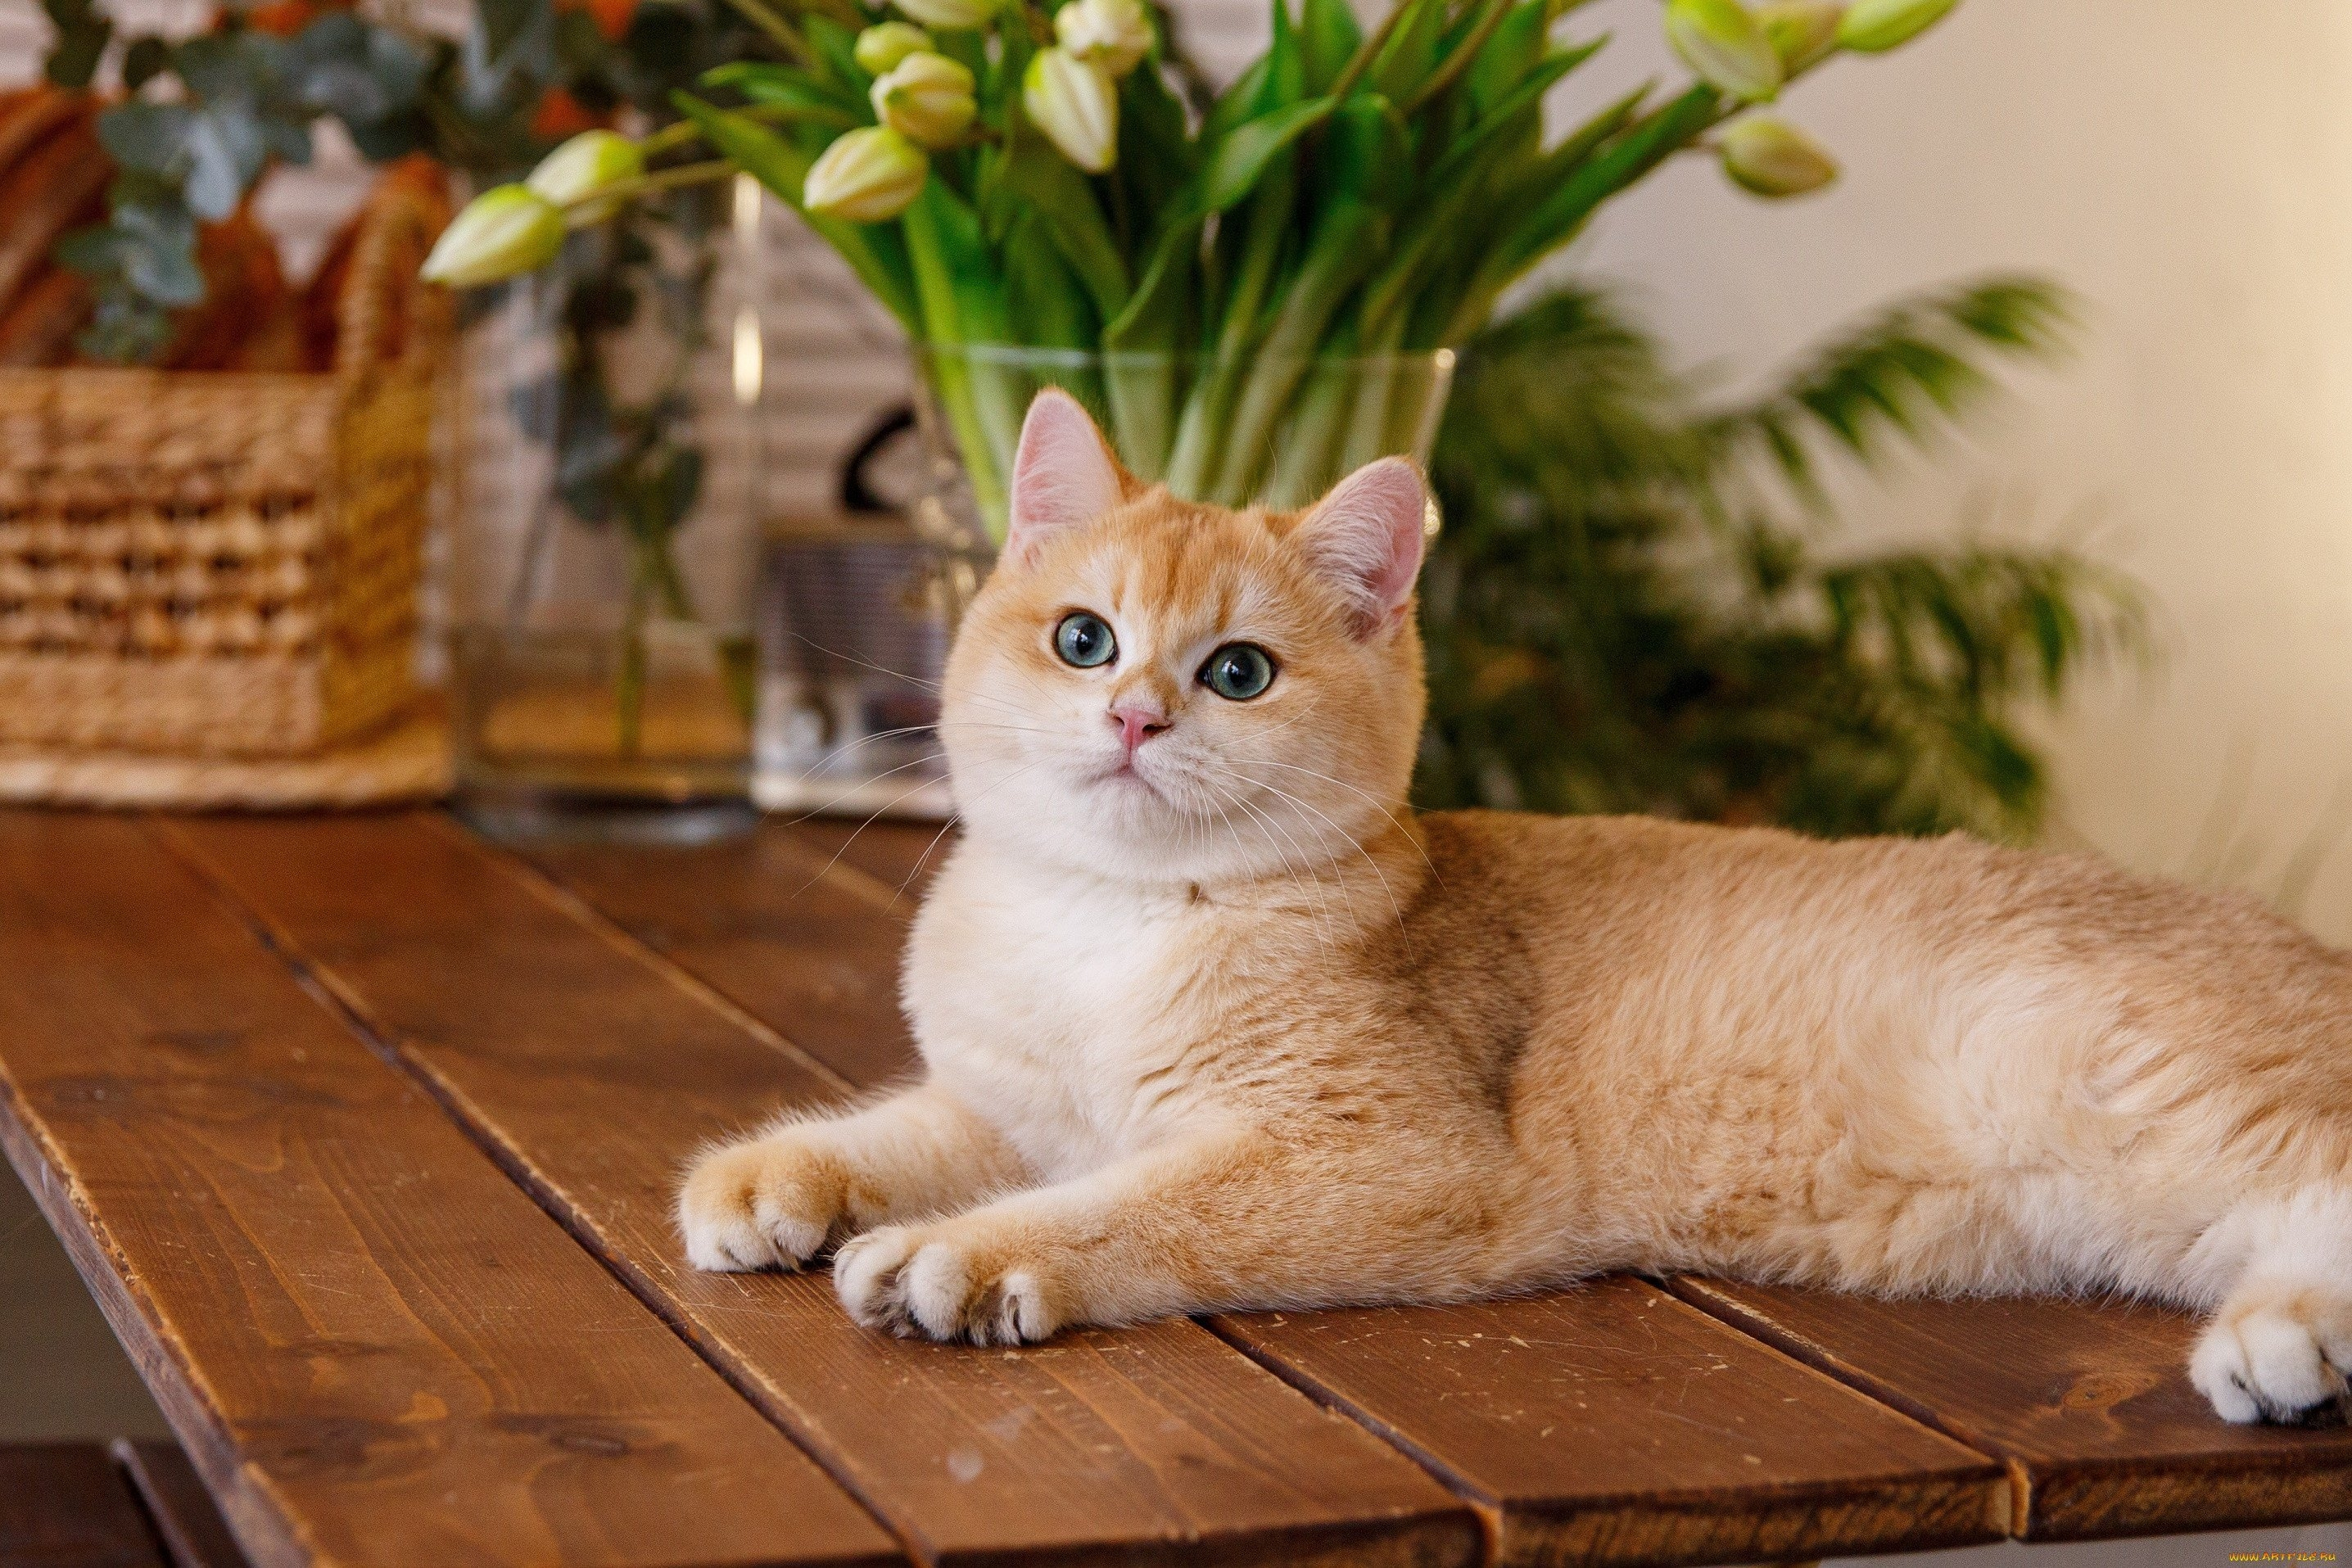

Dog
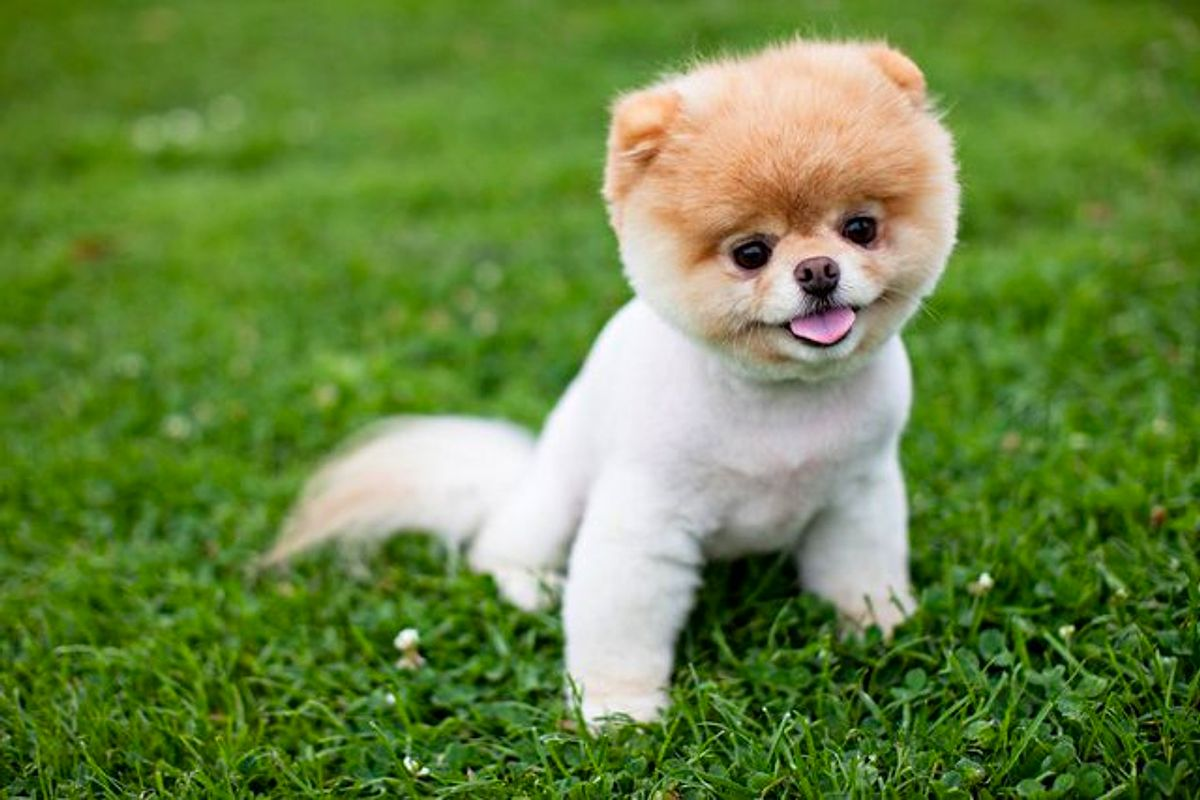

In [132]:
#cat
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img('./test_cat.jpg', target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.0
model.predict(x)

1/1 [==============================] - 1s 683ms/step


array([[0.00534716]], dtype=float32)

In [133]:
#dog
img = load_img('./test_dog.jpg', target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.0
model.predict(x)

1/1 [==============================] - 0s 72ms/step


array([[0.9986994]], dtype=float32)

In [150]:
def classify_image(path, model, target_size=(150, 150)):
    img = load_img(path, target_size=target_size)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x = x / 255.0
    pred = model.predict(x)
    if np.round(pred) == 1:
        print('Dog')
    else:
        print('Cat')

In [152]:
classify_image('./test_cat.jpg', model)

1/1 [==============================] - 0s 74ms/step
Cat


In [151]:
classify_image('./test_dog.jpg', model)

1/1 [==============================] - 0s 86ms/step
Dog


## The best model possible

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
from keras import layers

In [7]:
batch_size = 32

datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [130]:
# data_augmentation = keras.Sequential([
#     layers.RandomFlip('horizontal'),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.2)
# ])

## Xception

In [33]:
from keras.applications import Xception

In [34]:
xception_net = Xception(weights='imagenet',
                  include_top=False)
xception_net.trainable = False

In [35]:
# inputs = keras.Input(shape=(180, 180, 3))
# x = xception_net(inputs)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# model_xception = keras.Model(inputs, outputs)

# model_xception.compile(
#     loss='binary_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )

In [36]:
inputs = keras.Input(shape=(180, 180, 3))
x = xception_net(inputs)
x = keras.layers.GlobalAveragePooling2D()(x) # Better than Flatten for image features
x = keras.layers.BatchNormalization()(x)      # Stabilizes training
x = Dense(256, activation='relu')(x) # ReLU activation is generally better than none
x = Dropout(0.5)(x)                # Regularization
x = Dense(128, activation='relu')(x) # Added another dense layer for better feature learning
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.3)(x) # Slightly reduced dropout for the second dense layer
outputs = Dense(1, activation='sigmoid')(x) #Binary classification

model_xception = keras.Model(inputs, outputs)

model_xception.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [37]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_xception.keras', monitor='val_loss', save_best_only=True)
]

In [38]:
history_xception = model_xception.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1342535218.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_xception = model_xception.fit_generator(


625/625 [==============================] - 642s 1s/step - loss: 0.0831 - accuracy: 0.9718 - val_loss: 0.0546 - val_accuracy: 0.9825
Epoch 2/50
625/625 [==============================] - 671s 1s/step - loss: 0.0624 - accuracy: 0.9784 - val_loss: 0.0530 - val_accuracy: 0.9821
Epoch 3/50
625/625 [==============================] - 669s 1s/step - loss: 0.0506 - accuracy: 0.9819 - val_loss: 0.0492 - val_accuracy: 0.9834
Epoch 4/50
625/625 [==============================] - 666s 1s/step - loss: 0.0479 - accuracy: 0.9836 - val_loss: 0.0506 - val_accuracy: 0.9797
Epoch 5/50
625/625 [==============================] - 672s 1s/step - loss: 0.0421 - accuracy: 0.9847 - val_loss: 0.0512 - val_accuracy: 0.9809
Epoch 6/50
625/625 [==============================] - 674s 1s/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0625 - val_accuracy: 0.9809


In [39]:
scores = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3362309515.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 98.28%


In [40]:
# model_xception.save("model_xception.keras")

## InceptionV3

In [41]:
from keras.applications import InceptionV3

In [42]:
inception_net = InceptionV3(weights='imagenet',
                  include_top=False)
inception_net.trainable = False

In [43]:
inputs = keras.Input(shape=(180, 180, 3))
x = inception_net(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_inception = keras.Model(inputs, outputs)

model_inception.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [44]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_inception.keras', monitor='val_loss', save_best_only=True)
]

In [45]:
history_inception = model_inception.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\741904820.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_inception = model_inception.fit_generator(


625/625 [==============================] - 412s 652ms/step - loss: 6.1488 - accuracy: 0.9587 - val_loss: 2.4831 - val_accuracy: 0.9728
Epoch 2/50
625/625 [==============================] - 405s 648ms/step - loss: 1.8827 - accuracy: 0.9747 - val_loss: 1.3676 - val_accuracy: 0.9781
Epoch 3/50
625/625 [==============================] - 402s 643ms/step - loss: 0.8519 - accuracy: 0.9796 - val_loss: 0.7013 - val_accuracy: 0.9789
Epoch 4/50
625/625 [==============================] - 402s 642ms/step - loss: 0.5305 - accuracy: 0.9805 - val_loss: 0.5957 - val_accuracy: 0.9793
Epoch 5/50
625/625 [==============================] - 400s 639ms/step - loss: 0.4613 - accuracy: 0.9829 - val_loss: 0.6777 - val_accuracy: 0.9821
Epoch 6/50
625/625 [==============================] - 396s 633ms/step - loss: 0.3934 - accuracy: 0.9856 - val_loss: 0.7273 - val_accuracy: 0.9809
Epoch 7/50
625/625 [==============================] - 396s 633ms/step - loss: 0.4024 - accuracy: 0.9868 - val_loss: 1.4409 - val_accura

In [46]:
scores = model_inception.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3013796141.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_inception.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 96.15%


In [47]:
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# train_generator = datagen.flow_from_directory(
#     train,
#     target_size=(180, 180),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# # Create the base model
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# # Freeze the base model
# for layer in base_model.layers[:-10]:
#     layer.trainable = False

# # Add custom layers on top
# x = base_model.output
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation='sigmoid')(x)

# # Create the final model   

# model = keras.Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# history_inception = model_inception.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=50,
#     callbacks=callbacks,
#     validation_data=val_generator,
#     validation_steps=nb_validation_samples // batch_size
# )

# ResNet50V2

In [48]:
from keras.applications import ResNet50V2

In [49]:
resnet = ResNet50V2(weights='imagenet',
                  include_top=False)
resnet.trainable = False

In [50]:
inputs = keras.Input(shape=(180, 180, 3))
x = resnet(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_resnet = keras.Model(inputs, outputs)

model_resnet.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [51]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_resnet.keras', monitor='val_loss', save_best_only=True)
]

In [52]:
history_resnet = model_resnet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3050223590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet = model_resnet.fit_generator(


625/625 [==============================] - 755s 1s/step - loss: 5.4794 - accuracy: 0.9609 - val_loss: 2.3275 - val_accuracy: 0.9752
Epoch 2/50
625/625 [==============================] - 736s 1s/step - loss: 1.7857 - accuracy: 0.9765 - val_loss: 2.2351 - val_accuracy: 0.9602
Epoch 3/50
625/625 [==============================] - 736s 1s/step - loss: 0.6847 - accuracy: 0.9823 - val_loss: 1.0300 - val_accuracy: 0.9756
Epoch 4/50
625/625 [==============================] - 737s 1s/step - loss: 0.4721 - accuracy: 0.9851 - val_loss: 1.0437 - val_accuracy: 0.9765
Epoch 5/50
625/625 [==============================] - 739s 1s/step - loss: 0.3597 - accuracy: 0.9885 - val_loss: 1.5391 - val_accuracy: 0.9728
Epoch 6/50
625/625 [==============================] - 741s 1s/step - loss: 0.3203 - accuracy: 0.9906 - val_loss: 1.7979 - val_accuracy: 0.9724


In [53]:
scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\68345648.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 97.44%


## ResNet152V2

In [54]:
from keras.applications import ResNet152V2

In [55]:
resnet152 = ResNet152V2(weights='imagenet',
                  include_top=False)
resnet152.trainable = False

resnet152.summary()  

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_9[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

                                                                                                  
 conv2_block2_out (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_conv[0][0]']    
                                                                                                  
 conv2_block3_preact_bn (BatchN  (None, None, None,   1024       ['conv2_block2_out[0][0]']       
 ormalization)                  256)                                                              
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, None, None,   0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                        256)                                                              
                                                                                                  
 conv2_blo

                                128)                             ]                                
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, None, None,   0          ['conv3_block2_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_2_pad (ZeroPaddin  (None, None, None,   0          ['conv3_block2_1_relu[0][0]']    
 g2D)                           128)                                                              
          

 conv3_block4_2_relu (Activatio  (None, None, None,   0          ['conv3_block4_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block4_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block4_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block4_out (Add)         (None, None, None,   0           ['conv3_block3_out[0][0]',       
                                512)                              'conv3_block4_3_conv[0][0]']    
                                                                                                  
 conv3_block5_preact_bn (BatchN  (None, None, None,   2048       ['conv3_block4_out[0][0]']       
 ormalizat

                                                                                                  
 conv3_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block7_1_relu (Activatio  (None, None, None,   0          ['conv3_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block7_2_pad (ZeroPaddin  (None, None, None,   0          ['conv3_block7_1_relu[0][0]']    
 g2D)                           128)                                                              
                                                                                                  
 conv3_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block1_2_relu (Activatio  (None, None, None,   0          ['conv4_block1_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, None, None,   525312      ['conv4_block1_preact_relu[0][0]'
                                1024)                            ]                                
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block1_2_relu[0][0]']    
                                1024)                                                             
          

 conv4_block4_preact_relu (Acti  (None, None, None,   0          ['conv4_block4_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block4_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block4_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block4_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block6_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_blo

 vation)                        1024)                                                             
                                                                                                  
 conv4_block9_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block9_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block9_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
          

 conv4_block11_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block11_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block11_2_relu (Activati  (None, None, None,   0          ['conv4_block11_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block11_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block11_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block11_out (Add)        (None, None, None,   0           ['conv4_block10_out[0][0]',      
          

                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block14_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block14_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block14_1_relu (Activati  (None, None, None,   0          ['conv4_block14_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      256)                                                              
                                                                                                  
 conv4_block16_2_relu (Activati  (None, None, None,   0          ['conv4_block16_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block16_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block16_out (Add)        (None, None, None,   0           ['conv4_block15_out[0][0]',      
                                1024)                             'conv4_block16_3_conv[0][0]']   
          

 conv4_block19_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block19_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block19_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block19_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block19_1_relu (Activati  (None, None, None,   0          ['conv4_block19_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block19_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block19_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block21_2_relu (Activati  (None, None, None,   0          ['conv4_block21_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block21_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block21_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block21_out (Add)        (None, None, None,   0           ['conv4_block20_out[0][0]',      
                                1024)                             'conv4_block21_3_conv[0][0]']   
                                                                                                  
 conv4_blo

                                256)                             ']                               
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block24_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block24_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block24_1_relu[0][0]']   
 ng2D)                          256)                                                              
          

 conv4_block26_2_relu (Activati  (None, None, None,   0          ['conv4_block26_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block26_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block26_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block26_out (Add)        (None, None, None,   0           ['conv4_block25_out[0][0]',      
                                1024)                             'conv4_block26_3_conv[0][0]']   
                                                                                                  
 conv4_block27_preact_bn (Batch  (None, None, None,   4096       ['conv4_block26_out[0][0]']      
 Normaliza

                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block29_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block29_1_relu (Activati  (None, None, None,   0          ['conv4_block29_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block29_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block29_1_relu[0][0]']   
 ng2D)                          256)                                                              
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block31_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block31_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block31_out (Add)        (None, None, None,   0           ['conv4_block30_out[0][0]',      
                                1024)                             'conv4_block31_3_conv[0][0]']   
                                                                                                  
 conv4_block32_preact_bn (Batch  (None, None, None,   4096       ['conv4_block31_out[0][0]']      
 Normalization)                 1024)                                                             
          

 conv4_block34_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block34_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block34_1_relu (Activati  (None, None, None,   0          ['conv4_block34_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block34_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block34_1_relu[0][0]']   
 ng2D)                          256)                                                              
                                                                                                  
 conv4_block34_2_conv (Conv2D)  (None, None, None,   589824      ['conv4_block34_2_pad[0][0]']    
          

                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, None, None,   0          ['conv4_block35_out[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block36_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block36_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block36_out (Add)        (None, None, None,   0           ['max_pooling2d_9[0][0]',        
                                1024)                             'conv4_block36_3_conv[0][0]']   
                                                                                                  
 conv5_blo

 vation)                        2048)                                                             
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, None, None,   1048576     ['conv5_block3_preact_relu[0][0]'
                                512)                             ]                                
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
          

In [56]:
# inputs = keras.Input(shape=(180, 180, 3))
# x = resnet152(inputs)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# model_resnet152 = keras.Model(inputs, outputs)

# model_resnet152.compile(
#     loss='binary_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )

In [57]:
inputs = keras.Input(shape=(180, 180, 3))
x = resnet152(inputs)
x = keras.layers.GlobalAveragePooling2D()(x) # Better than Flatten for image features
x = keras.layers.BatchNormalization()(x)      # Stabilizes training
x = Dense(256, activation='relu')(x) # ReLU activation is generally better than none
x = Dropout(0.5)(x)                # Regularization
x = Dense(128, activation='relu')(x) # Added another dense layer for better feature learning
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.3)(x) # Slightly reduced dropout for the second dense layer
outputs = Dense(1, activation='sigmoid')(x) #Binary classification

model_resnet152 = keras.Model(inputs, outputs)

model_resnet152.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [58]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_resnet152.keras', monitor='val_loss', save_best_only=True)
]

In [59]:
history_resnet152 = model_resnet152.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\821994097.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet152 = model_resnet152.fit_generator(


625/625 [==============================] - 1726s 3s/step - loss: 0.0849 - accuracy: 0.9696 - val_loss: 0.0661 - val_accuracy: 0.9781
Epoch 2/50
625/625 [==============================] - 1625s 3s/step - loss: 0.0677 - accuracy: 0.9758 - val_loss: 0.0671 - val_accuracy: 0.9765
Epoch 3/50
625/625 [==============================] - 1705s 3s/step - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.0573 - val_accuracy: 0.9793
Epoch 4/50
625/625 [==============================] - 1613s 3s/step - loss: 0.0474 - accuracy: 0.9837 - val_loss: 0.0671 - val_accuracy: 0.9785
Epoch 5/50
625/625 [==============================] - 1708s 3s/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0665 - val_accuracy: 0.9801
Epoch 6/50
625/625 [==============================] - 1693s 3s/step - loss: 0.0311 - accuracy: 0.9887 - val_loss: 0.0877 - val_accuracy: 0.9785


In [60]:
scores = model_resnet152.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3828506558.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_resnet152.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 97.68%


## InceptionResNetV2

In [61]:
from keras.applications import InceptionResNetV2

In [62]:
inceptionresnet = InceptionResNetV2(weights='imagenet',
                  include_top=False)
inceptionresnet.trainable = False

inceptionresnet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_98 (Conv2D)             (None, None, None,   864         ['input_11[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_104 (Batch  (None, None, None,   96         ['conv2d_98[0][0]']              
 Normalization)                 32)                                             

                                                                                                  
 average_pooling2d_9 (AveragePo  (None, None, None,   0          ['max_pooling2d_11[0][0]']       
 oling2D)                       192)                                                              
                                                                                                  
 conv2d_103 (Conv2D)            (None, None, None,   18432       ['max_pooling2d_11[0][0]']       
                                96)                                                               
                                                                                                  
 conv2d_105 (Conv2D)            (None, None, None,   76800       ['activation_360[0][0]']         
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 batch_normalization_118 (Batch  (None, None, None,   96         ['conv2d_112[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_121 (Batch  (None, None, None,   192        ['conv2d_115[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 activation_366 (Activation)    (None, None, None,   0           ['batch_normalization_116[0][0]']
                                32)                                                               
                                                                                                  
 activatio

 block35_2_mixed (Concatenate)  (None, None, None,   0           ['activation_372[0][0]',         
                                128)                              'activation_374[0][0]',         
                                                                  'activation_377[0][0]']         
                                                                                                  
 block35_2_conv (Conv2D)        (None, None, None,   41280       ['block35_2_mixed[0][0]']        
                                320)                                                              
                                                                                                  
 block35_2 (Lambda)             (None, None, None,   0           ['block35_1_ac[0][0]',           
                                320)                              'block35_2_conv[0][0]']         
                                                                                                  
 block35_2

 batch_normalization_137 (Batch  (None, None, None,   96         ['conv2d_131[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 activation_387 (Activation)    (None, None, None,   0           ['batch_normalization_137[0][0]']
                                32)                                                               
                                                                                                  
 conv2d_129 (Conv2D)            (None, None, None,   10240       ['block35_3_ac[0][0]']           
                                32)                                                               
                                                                                                  
 conv2d_132 (Conv2D)            (None, None, None,   13824       ['activation_387[0][0]']         
          

 Normalization)                 48)                                                               
                                                                                                  
 activation_391 (Activation)    (None, None, None,   0           ['batch_normalization_141[0][0]']
                                32)                                                               
                                                                                                  
 activation_394 (Activation)    (None, None, None,   0           ['batch_normalization_144[0][0]']
                                48)                                                               
                                                                                                  
 conv2d_134 (Conv2D)            (None, None, None,   10240       ['block35_4_ac[0][0]']           
                                32)                                                               
          

                                                                                                  
 batch_normalization_146 (Batch  (None, None, None,   96         ['conv2d_140[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_148 (Batch  (None, None, None,   96         ['conv2d_142[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_151 (Batch  (None, None, None,   192        ['conv2d_145[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 activatio

 activation_407 (Activation)    (None, None, None,   0           ['batch_normalization_157[0][0]']
                                64)                                                               
                                                                                                  
 block35_7_mixed (Concatenate)  (None, None, None,   0           ['activation_402[0][0]',         
                                128)                              'activation_404[0][0]',         
                                                                  'activation_407[0][0]']         
                                                                                                  
 block35_7_conv (Conv2D)        (None, None, None,   41280       ['block35_7_mixed[0][0]']        
                                320)                                                              
                                                                                                  
 block35_7

 conv2d_161 (Conv2D)            (None, None, None,   10240       ['block35_8_ac[0][0]']           
                                32)                                                               
                                                                                                  
 batch_normalization_167 (Batch  (None, None, None,   96         ['conv2d_161[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 activation_417 (Activation)    (None, None, None,   0           ['batch_normalization_167[0][0]']
                                32)                                                               
                                                                                                  
 conv2d_159 (Conv2D)            (None, None, None,   10240       ['block35_8_ac[0][0]']           
          

 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_174 (Batch  (None, None, None,   144        ['conv2d_168[0][0]']             
 Normalization)                 48)                                                               
                                                                                                  
 activation_421 (Activation)    (None, None, None,   0           ['batch_normalization_171[0][0]']
                                32)                                                               
                                                                                                  
 activation_424 (Activation)    (None, None, None,   0           ['batch_normalization_174[0][0]']
                                48)                                                               
          

                                                                                                  
 activation_429 (Activation)    (None, None, None,   0           ['batch_normalization_179[0][0]']
                                384)                                                              
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, None, None,   0          ['block35_10_ac[0][0]']          
 )                              320)                                                              
                                                                                                  
 mixed_6a (Concatenate)         (None, None, None,   0           ['activation_426[0][0]',         
                                1088)                             'activation_429[0][0]',         
                                                                  'max_pooling2d_12[0][0]']       
          

 batch_normalization_184 (Batch  (None, None, None,   576        ['conv2d_178[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_187 (Batch  (None, None, None,   576        ['conv2d_181[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_434 (Activation)    (None, None, None,   0           ['batch_normalization_184[0][0]']
                                192)                                                              
                                                                                                  
 activation_437 (Activation)    (None, None, None,   0           ['batch_normalization_187[0][0]']
          

                                                                                                  
 batch_normalization_194 (Batch  (None, None, None,   480        ['conv2d_188[0][0]']             
 Normalization)                 160)                                                              
                                                                                                  
 activation_444 (Activation)    (None, None, None,   0           ['batch_normalization_194[0][0]']
                                160)                                                              
                                                                                                  
 conv2d_186 (Conv2D)            (None, None, None,   208896      ['block17_3_ac[0][0]']           
                                192)                                                              
                                                                                                  
 conv2d_18

                                1088)                                                             
                                                                                                  
 conv2d_195 (Conv2D)            (None, None, None,   139264      ['block17_5_ac[0][0]']           
                                128)                                                              
                                                                                                  
 batch_normalization_201 (Batch  (None, None, None,   384        ['conv2d_195[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 activation_451 (Activation)    (None, None, None,   0           ['batch_normalization_201[0][0]']
                                128)                                                              
          

 activation_457 (Activation)    (None, None, None,   0           ['batch_normalization_207[0][0]']
                                192)                                                              
                                                                                                  
 block17_7_mixed (Concatenate)  (None, None, None,   0           ['activation_454[0][0]',         
                                384)                              'activation_457[0][0]']         
                                                                                                  
 block17_7_conv (Conv2D)        (None, None, None,   418880      ['block17_7_mixed[0][0]']        
                                1088)                                                             
                                                                                                  
 block17_7 (Lambda)             (None, None, None,   0           ['block17_6_ac[0][0]',           
          

                                                                                                  
 conv2d_209 (Conv2D)            (None, None, None,   215040      ['activation_464[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_212 (Batch  (None, None, None,   576        ['conv2d_206[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_215 (Batch  (None, None, None,   576        ['conv2d_209[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_216 (Conv2D)            (None, None, None,   143360      ['activation_471[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_222 (Batch  (None, None, None,   480        ['conv2d_216[0][0]']             
 Normalization)                 160)                                                              
                                                                                                  
 activation_472 (Activation)    (None, None, None,   0           ['batch_normalization_222[0][0]']
                                160)                                                              
          

 block17_12 (Lambda)            (None, None, None,   0           ['block17_11_ac[0][0]',          
                                1088)                             'block17_12_conv[0][0]']        
                                                                                                  
 block17_12_ac (Activation)     (None, None, None,   0           ['block17_12[0][0]']             
                                1088)                                                             
                                                                                                  
 conv2d_223 (Conv2D)            (None, None, None,   139264      ['block17_12_ac[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_229 (Batch  (None, None, None,   384        ['conv2d_223[0][0]']             
 Normaliza

                                                                                                  
 activation_482 (Activation)    (None, None, None,   0           ['batch_normalization_232[0][0]']
                                192)                                                              
                                                                                                  
 activation_485 (Activation)    (None, None, None,   0           ['batch_normalization_235[0][0]']
                                192)                                                              
                                                                                                  
 block17_14_mixed (Concatenate)  (None, None, None,   0          ['activation_482[0][0]',         
                                384)                              'activation_485[0][0]']         
                                                                                                  
 block17_1

                                160)                                                              
                                                                                                  
 conv2d_234 (Conv2D)            (None, None, None,   208896      ['block17_15_ac[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_237 (Conv2D)            (None, None, None,   215040      ['activation_492[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_240 (Batch  (None, None, None,   576        ['conv2d_234[0][0]']             
 Normalization)                 192)                                                              
          

 batch_normalization_249 (Batch  (None, None, None,   384        ['conv2d_243[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 activation_499 (Activation)    (None, None, None,   0           ['batch_normalization_249[0][0]']
                                128)                                                              
                                                                                                  
 conv2d_244 (Conv2D)            (None, None, None,   143360      ['activation_499[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_250 (Batch  (None, None, None,   480        ['conv2d_244[0][0]']             
 Normaliza

                                                                                                  
 block17_19_conv (Conv2D)       (None, None, None,   418880      ['block17_19_mixed[0][0]']       
                                1088)                                                             
                                                                                                  
 block17_19 (Lambda)            (None, None, None,   0           ['block17_18_ac[0][0]',          
                                1088)                             'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, None, None,   0           ['block17_19[0][0]']             
                                1088)                                                             
                                                                                                  
 conv2d_25

 Normalization)                 288)                                                              
                                                                                                  
 activation_510 (Activation)    (None, None, None,   0           ['batch_normalization_260[0][0]']
                                256)                                                              
                                                                                                  
 activation_512 (Activation)    (None, None, None,   0           ['batch_normalization_262[0][0]']
                                256)                                                              
                                                                                                  
 activation_515 (Activation)    (None, None, None,   0           ['batch_normalization_265[0][0]']
                                288)                                                              
          

                                448)                              'activation_520[0][0]']         
                                                                                                  
 block8_1_conv (Conv2D)         (None, None, None,   933920      ['block8_1_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 block8_1 (Lambda)              (None, None, None,   0           ['mixed_7a[0][0]',               
                                2080)                             'block8_1_conv[0][0]']          
                                                                                                  
 block8_1_ac (Activation)       (None, None, None,   0           ['block8_1[0][0]']               
                                2080)                                                             
          

 batch_normalization_275 (Batch  (None, None, None,   576        ['conv2d_269[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_278 (Batch  (None, None, None,   768        ['conv2d_272[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activation_525 (Activation)    (None, None, None,   0           ['batch_normalization_275[0][0]']
                                192)                                                              
                                                                                                  
 activation_528 (Activation)    (None, None, None,   0           ['batch_normalization_278[0][0]']
          

                                                                                                  
 batch_normalization_285 (Batch  (None, None, None,   672        ['conv2d_279[0][0]']             
 Normalization)                 224)                                                              
                                                                                                  
 activation_535 (Activation)    (None, None, None,   0           ['batch_normalization_285[0][0]']
                                224)                                                              
                                                                                                  
 conv2d_277 (Conv2D)            (None, None, None,   399360      ['block8_4_ac[0][0]']            
                                192)                                                              
                                                                                                  
 conv2d_28

                                2080)                                                             
                                                                                                  
 conv2d_286 (Conv2D)            (None, None, None,   399360      ['block8_6_ac[0][0]']            
                                192)                                                              
                                                                                                  
 batch_normalization_292 (Batch  (None, None, None,   576        ['conv2d_286[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_542 (Activation)    (None, None, None,   0           ['batch_normalization_292[0][0]']
                                192)                                                              
          

 activation_548 (Activation)    (None, None, None,   0           ['batch_normalization_298[0][0]']
                                256)                                                              
                                                                                                  
 block8_8_mixed (Concatenate)   (None, None, None,   0           ['activation_545[0][0]',         
                                448)                              'activation_548[0][0]']         
                                                                                                  
 block8_8_conv (Conv2D)         (None, None, None,   933920      ['block8_8_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 block8_8 (Lambda)              (None, None, None,   0           ['block8_7_ac[0][0]',            
          

                                                                                                  
 conv2d_300 (Conv2D)            (None, None, None,   172032      ['activation_555[0][0]']         
                                256)                                                              
                                                                                                  
 batch_normalization_303 (Batch  (None, None, None,   576        ['conv2d_297[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_306 (Batch  (None, None, None,   768        ['conv2d_300[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activatio

In [63]:
# inputs = keras.Input(shape=(180, 180, 3))
# x = inceptionresnet(inputs)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# model_inceptionresnet = keras.Model(inputs, outputs)

# model_inceptionresnet.compile(
#     loss='binary_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )

In [64]:
inputs = keras.Input(shape=(180, 180, 3))
x = inceptionresnet(inputs)
x = keras.layers.GlobalAveragePooling2D()(x) # Better than Flatten for image features
x = keras.layers.BatchNormalization()(x)      # Stabilizes training
x = Dense(256, activation='relu')(x) # ReLU activation is generally better than none
x = Dropout(0.5)(x)                # Regularization
x = Dense(128, activation='relu')(x) # Added another dense layer for better feature learning
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.3)(x) # Slightly reduced dropout for the second dense layer
outputs = Dense(1, activation='sigmoid')(x) #Binary classification

model_inceptionresnet = keras.Model(inputs, outputs)

model_inceptionresnet.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [65]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_inceptionresnet.keras', monitor='val_loss', save_best_only=True)
]

In [66]:
history_inceptionresnet = model_inceptionresnet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1707522033.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_inceptionresnet = model_inceptionresnet.fit_generator(


625/625 [==============================] - 1387s 2s/step - loss: 0.0698 - accuracy: 0.9768 - val_loss: 0.0568 - val_accuracy: 0.9809
Epoch 2/50
625/625 [==============================] - 1332s 2s/step - loss: 0.0566 - accuracy: 0.9804 - val_loss: 0.0520 - val_accuracy: 0.9817
Epoch 3/50
625/625 [==============================] - 1340s 2s/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0471 - val_accuracy: 0.9842
Epoch 4/50
625/625 [==============================] - 1341s 2s/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.0596 - val_accuracy: 0.9825
Epoch 5/50
625/625 [==============================] - 1346s 2s/step - loss: 0.0434 - accuracy: 0.9851 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 6/50
625/625 [==============================] - 1353s 2s/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.0616 - val_accuracy: 0.9821


In [67]:
scores = model_inceptionresnet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\702246441.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_inceptionresnet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 98.36%


## DenseNet201

In [68]:
from keras.applications import DenseNet201

In [69]:
densenet = DenseNet201(weights='imagenet',
                  include_top=False)
densenet.trainable = False

densenet.summary()  

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, None, None,   0          ['input_13[0][0]']               
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_4[0][0]']       
                                64)                                                     

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv4_block28_0_relu (Activati  (None, None, None,   0          ['conv4_block28_0_bn[0][0]']     
 on)                            1120)                                                             
                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, None, None,   143360      ['conv4_block28_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block28_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block28_1_relu (Activati  (None, None, None,   0          ['conv4_block28_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block32_0_relu (Activati  (None, None, None,   0          ['conv4_block32_0_bn[0][0]']     
 on)                            1248)                                                             
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, None, None,   159744      ['conv4_block32_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block32_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_blo

 lization)                      1376)                                                             
                                                                                                  
 conv4_block36_0_relu (Activati  (None, None, None,   0          ['conv4_block36_0_bn[0][0]']     
 on)                            1376)                                                             
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, None, None,   176128      ['conv4_block36_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block36_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv4_block40_0_bn (BatchNorma  (None, None, None,   6016       ['conv4_block39_concat[0][0]']   
 lization)                      1504)                                                             
                                                                                                  
 conv4_block40_0_relu (Activati  (None, None, None,   0          ['conv4_block40_0_bn[0][0]']     
 on)                            1504)                                                             
                                                                                                  
 conv4_block40_1_conv (Conv2D)  (None, None, None,   192512      ['conv4_block40_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block40_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block40_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block44_0_bn (BatchNorma  (None, None, None,   6528       ['conv4_block43_concat[0][0]']   
 lization)                      1632)                                                             
                                                                                                  
 conv4_block44_0_relu (Activati  (None, None, None,   0          ['conv4_block44_0_bn[0][0]']     
 on)                            1632)                                                             
                                                                                                  
 conv4_block44_1_conv (Conv2D)  (None, None, None,   208896      ['conv4_block44_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_blo

 ate)                           1760)                             'conv4_block47_2_conv[0][0]']   
                                                                                                  
 conv4_block48_0_bn (BatchNorma  (None, None, None,   7040       ['conv4_block47_concat[0][0]']   
 lization)                      1760)                                                             
                                                                                                  
 conv4_block48_0_relu (Activati  (None, None, None,   0          ['conv4_block48_0_bn[0][0]']     
 on)                            1760)                                                             
                                                                                                  
 conv4_block48_1_conv (Conv2D)  (None, None, None,   225280      ['conv4_block48_0_relu[0][0]']   
                                128)                                                              
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   122880      ['conv5_block3_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block3_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, None, None,   139264      ['conv5_block7_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_blo

 on)                            1216)                                                             
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, None, None,   155648      ['conv5_block11_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block11_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block15_0_relu (Activati  (None, None, None,   0          ['conv5_block15_0_bn[0][0]']     
 on)                            1344)                                                             
                                                                                                  
 conv5_block15_1_conv (Conv2D)  (None, None, None,   172032      ['conv5_block15_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block19_0_relu (Activati  (None, None, None,   0          ['conv5_block19_0_bn[0][0]']     
 on)                            1472)                                                             
                                                                                                  
 conv5_block19_1_conv (Conv2D)  (None, None, None,   188416      ['conv5_block19_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block19_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block19_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_blo

 lization)                      1600)                                                             
                                                                                                  
 conv5_block23_0_relu (Activati  (None, None, None,   0          ['conv5_block23_0_bn[0][0]']     
 on)                            1600)                                                             
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, None, None,   204800      ['conv5_block23_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block23_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv5_block27_0_bn (BatchNorma  (None, None, None,   6912       ['conv5_block26_concat[0][0]']   
 lization)                      1728)                                                             
                                                                                                  
 conv5_block27_0_relu (Activati  (None, None, None,   0          ['conv5_block27_0_bn[0][0]']     
 on)                            1728)                                                             
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, None, None,   221184      ['conv5_block27_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block27_1_conv[0][0]']   
 lization)

                                                                                                  
 conv5_block31_0_bn (BatchNorma  (None, None, None,   7424       ['conv5_block30_concat[0][0]']   
 lization)                      1856)                                                             
                                                                                                  
 conv5_block31_0_relu (Activati  (None, None, None,   0          ['conv5_block31_0_bn[0][0]']     
 on)                            1856)                                                             
                                                                                                  
 conv5_block31_1_conv (Conv2D)  (None, None, None,   237568      ['conv5_block31_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_blo

In [70]:
inputs = keras.Input(shape=(180, 180, 3))
x = densenet(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_densenet = keras.Model(inputs, outputs)

model_densenet.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [71]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_densenet.keras', monitor='val_loss', save_best_only=True)
]

In [72]:
history_densenet = model_densenet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3810000991.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_densenet = model_densenet.fit_generator(


625/625 [==============================] - 1814s 3s/step - loss: 3.6926 - accuracy: 0.9683 - val_loss: 1.8730 - val_accuracy: 0.9838
Epoch 2/50
625/625 [==============================] - 1763s 3s/step - loss: 1.5808 - accuracy: 0.9808 - val_loss: 1.0237 - val_accuracy: 0.9813
Epoch 3/50
625/625 [==============================] - 1761s 3s/step - loss: 0.7618 - accuracy: 0.9834 - val_loss: 0.9494 - val_accuracy: 0.9785
Epoch 4/50
625/625 [==============================] - 1765s 3s/step - loss: 0.4881 - accuracy: 0.9851 - val_loss: 0.5998 - val_accuracy: 0.9846
Epoch 5/50
625/625 [==============================] - 1765s 3s/step - loss: 0.3038 - accuracy: 0.9879 - val_loss: 0.6885 - val_accuracy: 0.9834
Epoch 6/50
625/625 [==============================] - 1768s 3s/step - loss: 0.3338 - accuracy: 0.9873 - val_loss: 0.9196 - val_accuracy: 0.9830
Epoch 7/50
625/625 [==============================] - 1777s 3s/step - loss: 0.2771 - accuracy: 0.9898 - val_loss: 0.7904 - val_accuracy: 0.9834


In [73]:
scores = model_densenet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1380357281.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_densenet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 98.12%


## ResNet101V2

In [74]:
from keras.applications import ResNet101V2

In [75]:
resnet101 = ResNet101V2(weights='imagenet',
                  include_top=False)
resnet101.trainable = False

resnet101.summary()  

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_15[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

                                                                                                  
 conv2_block2_out (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_conv[0][0]']    
                                                                                                  
 conv2_block3_preact_bn (BatchN  (None, None, None,   1024       ['conv2_block2_out[0][0]']       
 ormalization)                  256)                                                              
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, None, None,   0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                        256)                                                              
                                                                                                  
 conv2_blo

                                128)                             ]                                
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, None, None,   0          ['conv3_block2_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_2_pad (ZeroPaddin  (None, None, None,   0          ['conv3_block2_1_relu[0][0]']    
 g2D)                           128)                                                              
          

 conv3_block4_2_relu (Activatio  (None, None, None,   0          ['conv3_block4_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, None, None,   0          ['conv3_block3_out[0][0]']       
 )                              512)                                                              
                                                                                                  
 conv3_block4_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block4_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block4_out (Add)         (None, None, None,   0           ['max_pooling2d_15[0][0]',       
          

                                                                                                  
 conv4_block3_preact_relu (Acti  (None, None, None,   0          ['conv4_block3_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block3_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block3_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv4_block8_preact_relu (Acti  (None, None, None,   0          ['conv4_block8_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block8_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block8_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block10_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block10_2_relu (Activati  (None, None, None,   0          ['conv4_block10_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block10_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_blo

 ivation)                       1024)                                                             
                                                                                                  
 conv4_block13_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block13_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block13_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block13_1_relu (Activati  (None, None, None,   0          ['conv4_block13_1_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block15_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block15_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block15_2_relu (Activati  (None, None, None,   0          ['conv4_block15_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block15_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block15_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block15_out (Add)        (None, None, None,   0           ['conv4_block14_out[0][0]',      
          

                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block18_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block18_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block18_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block18_1_relu (Activati  (None, None, None,   0          ['conv4_block18_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block20_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block20_out (Add)        (None, None, None,   0           ['conv4_block19_out[0][0]',      
                                1024)                             'conv4_block20_3_conv[0][0]']   
          

 conv4_block23_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block23_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block23_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, None, None,   2359296     ['conv5_block2_2_pad[0][0]']     
                                512)                                                              
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, None, None,   2048       ['conv5_block2_2_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, None, None,   0          ['conv5_block2_2_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_blo

In [76]:
# inputs = keras.Input(shape=(180, 180, 3))
# x = resnet101(inputs)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# model_resnet101 = keras.Model(inputs, outputs)

# model_resnet101.compile(
#     loss='binary_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )

In [77]:
inputs = keras.Input(shape=(180, 180, 3))
x = resnet101(inputs)
x = keras.layers.GlobalAveragePooling2D()(x) # Better than Flatten for image features
x = keras.layers.BatchNormalization()(x)      # Stabilizes training
x = Dense(256, activation='relu')(x) # ReLU activation is generally better than none
x = Dropout(0.5)(x)                # Regularization
x = Dense(128, activation='relu')(x) # Added another dense layer for better feature learning
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.3)(x) # Slightly reduced dropout for the second dense layer
outputs = Dense(1, activation='sigmoid')(x) #Binary classification

model_resnet101 = keras.Model(inputs, outputs)

model_resnet101.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [78]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_resnet101.keras', monitor='val_loss', save_best_only=True)
]

In [79]:
history_resnet101 = model_resnet101.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1116254190.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet101 = model_resnet101.fit_generator(


625/625 [==============================] - 1833s 3s/step - loss: 0.0960 - accuracy: 0.9661 - val_loss: 0.0492 - val_accuracy: 0.9834
Epoch 2/50
625/625 [==============================] - 1806s 3s/step - loss: 0.0646 - accuracy: 0.9759 - val_loss: 0.0538 - val_accuracy: 0.9809
Epoch 3/50
625/625 [==============================] - 1807s 3s/step - loss: 0.0534 - accuracy: 0.9814 - val_loss: 0.0497 - val_accuracy: 0.9797
Epoch 4/50
625/625 [==============================] - 1806s 3s/step - loss: 0.0494 - accuracy: 0.9834 - val_loss: 0.0545 - val_accuracy: 0.9817


In [80]:
scores = model_resnet101.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1177572845.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_resnet101.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 97.60%


## NasNetLarge

In [81]:
from keras.applications import NASNetLarge

In [82]:
nasnet = NASNetLarge(weights='imagenet',
                    include_top=False,
                    input_shape=(180, 180, 3))
nasnet.trainable = False

In [83]:
inputs = keras.Input(shape=(180, 180, 3))
x = nasnet(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_nasnet = keras.Model(inputs, outputs)

model_nasnet.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [84]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_nasnet.keras', monitor='val_loss', save_best_only=True)
]

In [85]:
history_nasnet = model_nasnet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1497361559.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_nasnet = model_nasnet.fit_generator(


625/625 [==============================] - 3019s 5s/step - loss: 5.0433 - accuracy: 0.9748 - val_loss: 2.9116 - val_accuracy: 0.9805
Epoch 2/50
625/625 [==============================] - 2986s 5s/step - loss: 1.8474 - accuracy: 0.9866 - val_loss: 2.5802 - val_accuracy: 0.9850
Epoch 3/50
625/625 [==============================] - 3003s 5s/step - loss: 0.9378 - accuracy: 0.9896 - val_loss: 2.8558 - val_accuracy: 0.9838
Epoch 4/50
625/625 [==============================] - 2999s 5s/step - loss: 0.4808 - accuracy: 0.9943 - val_loss: 2.4982 - val_accuracy: 0.9838
Epoch 5/50
625/625 [==============================] - 2999s 5s/step - loss: 0.4022 - accuracy: 0.9941 - val_loss: 2.3409 - val_accuracy: 0.9817
Epoch 6/50
625/625 [==============================] - 2994s 5s/step - loss: 0.2421 - accuracy: 0.9960 - val_loss: 3.7735 - val_accuracy: 0.9777
Epoch 7/50
625/625 [==============================] - 3002s 5s/step - loss: 0.1760 - accuracy: 0.9965 - val_loss: 3.3907 - val_accuracy: 0.9789
Epo

In [86]:
scores = model_nasnet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\1011859402.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_nasnet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 98.16%


## NASNetMobile

In [87]:
from keras.applications import NASNetMobile

In [88]:
nasnetmob = NASNetMobile(weights='imagenet',
                    include_top=False,
                    input_shape=(180, 180, 3))
nasnetmob.trainable = False

In [89]:
inputs = keras.Input(shape=(180, 180, 3))
x = nasnetmob(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_nasnetmob = keras.Model(inputs, outputs)

model_nasnetmob.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [90]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint('./checkpoint/model_nasnetmob.keras', monitor='val_loss', save_best_only=True)
]

In [91]:
history_nasnetmob = model_nasnetmob.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    callbacks=callbacks,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50


C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\2090538203.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_nasnetmob = model_nasnetmob.fit_generator(


625/625 [==============================] - 467s 731ms/step - loss: 3.2034 - accuracy: 0.9604 - val_loss: 1.8598 - val_accuracy: 0.9720
Epoch 2/50
625/625 [==============================] - 451s 722ms/step - loss: 1.1960 - accuracy: 0.9714 - val_loss: 0.9950 - val_accuracy: 0.9761
Epoch 3/50
625/625 [==============================] - 451s 722ms/step - loss: 0.4551 - accuracy: 0.9770 - val_loss: 0.5644 - val_accuracy: 0.9704
Epoch 4/50
625/625 [==============================] - 451s 721ms/step - loss: 0.2739 - accuracy: 0.9773 - val_loss: 0.5797 - val_accuracy: 0.9663
Epoch 5/50
625/625 [==============================] - 452s 722ms/step - loss: 0.2440 - accuracy: 0.9801 - val_loss: 0.4946 - val_accuracy: 0.9748
Epoch 6/50
625/625 [==============================] - 462s 740ms/step - loss: 0.2563 - accuracy: 0.9828 - val_loss: 0.4735 - val_accuracy: 0.9801
Epoch 7/50
625/625 [==============================] - 452s 723ms/step - loss: 0.2368 - accuracy: 0.9838 - val_loss: 0.7376 - val_accura

In [92]:
scores = model_nasnetmob.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\emil_\AppData\Local\Temp\ipykernel_4860\3071683523.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_nasnetmob.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 97.24%


In [131]:
# model_xception.save("./checkpoint_last/model_xception.keras")
# model_inception.save("./checkpoint_last/model_inception.keras")
# model_resnet.save("./checkpoint_last/model_resnet.keras")
# model_inceptionresnet.save("./checkpoint_last/model_inceptionresnet.keras")
# model_resnet152.save("./checkpoint_last/model_resnet152.keras")
# model_densenet.save("./checkpoint_last/model_densenet.keras")
# model_resnet101.save("./checkpoint_last/model_resnet101.keras")
# model_nasnet.save("./checkpoint_last/model_nasnet.keras")
# model_nasnetmob.save("./checkpoint_last/model_nasnetmob.keras")

## Ensemble

In [8]:
from tensorflow.keras.models import load_model

In [9]:
model_xception = load_model('./checkpoint_last/model_xception.keras')
model_inception = load_model('./checkpoint_last/model_inception.keras')
model_resnet = load_model('./checkpoint_last/model_resnet.keras')
model_inceptionresnet = load_model('./checkpoint_last/model_inceptionresnet.keras')
model_resnet152 = load_model('./checkpoint_last/model_resnet152.keras')
model_densenet = load_model('./checkpoint_last/model_densenet.keras')
model_resnet101 = load_model('./checkpoint_last/model_resnet101.keras')
model_nasnet = load_model('./checkpoint_last/model_nasnet.keras')
model_nasnetmob = load_model('./checkpoint_last/model_nasnetmob.keras')

In [10]:
model_xception_bestval = load_model('./checkpoint/model_xception.keras')
model_inception_bestval = load_model('./checkpoint/model_inception.keras')
model_resnet_bestval = load_model('./checkpoint/model_resnet.keras')
model_inceptionresnet_bestval = load_model('./checkpoint/model_inceptionresnet.keras')
model_resnet152_bestval = load_model('./checkpoint/model_resnet152.keras')
model_densenet_bestval = load_model('./checkpoint/model_densenet.keras')
model_resnet101_bestval = load_model('./checkpoint/model_resnet101.keras')
model_nasnet_bestval = load_model('./checkpoint/model_nasnet.keras')
model_nasnetmob_bestval = load_model('./checkpoint/model_nasnetmob.keras')

In [11]:
model_xception_init = load_model('./checkpoint_init/model_xception.keras')
model_inception_init = load_model('./checkpoint_init/model_inception.keras')
model_resnet_init = load_model('./checkpoint_init/model_resnet.keras')
model_inceptionresnet_init = load_model('./checkpoint_init/model_inceptionresnet.keras')
model_resnet152_init = load_model('./checkpoint_init/model_resnet152.keras')
model_densenet_init = load_model('./checkpoint_init/model_densenet.keras')
model_resnet101_init = load_model('./checkpoint_init/model_resnet101.keras')
model_nasnet_init = load_model('./checkpoint_init/model_nasnet.keras')

In [12]:
X_test = []
y_test = []

for i in range(len(test_generator)):
    x, y = test_generator.next()
    X_test.extend(x)
    y_test.extend(y)

In [13]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
pred_xception = model_xception.predict(X_test)
pred_inception = model_inception.predict(X_test)
pred_resnet = model_resnet.predict(X_test)
pred_inceptionresnet = model_inceptionresnet.predict(X_test)
pred_resnet152 = model_resnet152.predict(X_test)
pred_densenet = model_densenet.predict(X_test)
pred_resnet101 = model_resnet101.predict(X_test)
pred_nasnet = model_nasnet.predict(X_test)
pred_nasnetmob = model_nasnetmob.predict(X_test)

pred_xception_bestval = model_xception_bestval.predict(X_test)
pred_inception_bestval = model_inception_bestval.predict(X_test)
pred_resnet_bestval = model_resnet_bestval.predict(X_test)
pred_inceptionresnet_bestval = model_inceptionresnet_bestval.predict(X_test)
pred_resnet152_bestval = model_resnet152_bestval.predict(X_test)
pred_densenet_bestval = model_densenet_bestval.predict(X_test)
pred_resnet101_bestval = model_resnet101_bestval.predict(X_test)
pred_nasnet_bestval = model_nasnet_bestval.predict(X_test)
pred_nasnetmob_bestval = model_nasnetmob_bestval.predict(X_test)

79/79 [==============================] - 40s 469ms/step


In [15]:
pred_xception_init = model_xception_init.predict(X_test)
pred_inception_init = model_inception_init.predict(X_test)
pred_resnet_init = model_resnet_init.predict(X_test)
pred_inceptionresnet_init = model_inceptionresnet_init.predict(X_test)
pred_resnet152_init = model_resnet152_init.predict(X_test)
pred_densenet_init = model_densenet_init.predict(X_test)
pred_resnet101_init = model_resnet101_init.predict(X_test)
pred_nasnet_init = model_nasnet_init.predict(X_test)

79/79 [==============================] - 218s 3s/step


In [100]:
print(accuracy_score(np.round(pred_xception), y_test))
print(accuracy_score(np.round(pred_inception), y_test))
print(accuracy_score(np.round(pred_resnet), y_test))
print(accuracy_score(np.round(pred_inceptionresnet), y_test))
print(accuracy_score(np.round(pred_resnet152), y_test))
print(accuracy_score(np.round(pred_densenet), y_test))
print(accuracy_score(np.round(pred_resnet101), y_test))
print(accuracy_score(np.round(pred_nasnet), y_test))
print(accuracy_score(np.round(pred_nasnetmob), y_test))

0.9828
0.9616
0.9744
0.9836
0.9768
0.9812
0.976
0.9816
0.9724


In [101]:
print(accuracy_score(np.round(pred_xception_bestval), y_test))
print(accuracy_score(np.round(pred_inception_bestval), y_test))
print(accuracy_score(np.round(pred_resnet_bestval), y_test))
print(accuracy_score(np.round(pred_inceptionresnet_bestval), y_test))
print(accuracy_score(np.round(pred_resnet152_bestval), y_test))
print(accuracy_score(np.round(pred_densenet_bestval), y_test))
print(accuracy_score(np.round(pred_resnet101_bestval), y_test))
print(accuracy_score(np.round(pred_nasnet_bestval), y_test))
print(accuracy_score(np.round(pred_nasnetmob_bestval), y_test))

0.9824
0.9776
0.9724
0.9832
0.9792
0.9784
0.976
0.9816
0.972


In [107]:
print(accuracy_score(np.round(pred_xception_init), y_test))
print(accuracy_score(np.round(pred_inception_init), y_test))
print(accuracy_score(np.round(pred_resnet_init), y_test))
print(accuracy_score(np.round(pred_inceptionresnet_init), y_test))
print(accuracy_score(np.round(pred_resnet152_init), y_test))
print(accuracy_score(np.round(pred_densenet_init), y_test))
print(accuracy_score(np.round(pred_resnet101_init), y_test))
print(accuracy_score(np.round(pred_nasnet_init), y_test))

0.9848
0.9788
0.9724
0.9848
0.9752
0.976
0.9728
0.98


## Result

In [16]:
from itertools import combinations

def find_best_ensemble(predictions, y_test):
    all_models = list(predictions.keys())
    best_accuracy = 0
    best_combo = []

    for r in range(2, len(all_models) + 1):
        for combo in combinations(all_models, r):
            ensemble_prediction = np.mean([predictions[model] for model in combo], axis=0)
            accuracy = accuracy_score(np.round(ensemble_prediction), y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combo = combo

    return best_accuracy, best_combo


predictions = {
  'Xception_bestval': pred_xception_bestval,
  'Inception_bestval': pred_inception_bestval,
  'ResNet_bestval': pred_resnet_bestval,
  'InceptionResNet_bestval': pred_inceptionresnet_bestval,
#   'ResNet152_bestval': pred_resnet152_bestval,
  'DenseNet_bestval': pred_densenet_bestval,
#   'ResNet101_bestval': pred_resnet101_bestval,
  'NasNet_bestval': pred_nasnet_bestval,
#   'NasNetMobile_bestval': pred_nasnetmob_bestval,
  'Xception_init': pred_xception_init,
  'Inception_init': pred_inception_init,
  'ResNet50_init': pred_resnet_init,
  'InceptionResNet_init': pred_inceptionresnet_init,
#   'ResNet152_init': pred_resnet152_init,
  'DenseNet_init': pred_densenet_init,
#   'ResNet101_init': pred_resnet101_init,
  'NasNet_init': pred_nasnet_init,
  'Xception': pred_xception,
  'Inception': pred_inception,
  'ResNet50': pred_resnet,
  'InceptionResNet': pred_inceptionresnet,
#   'ResNet152': pred_resnet152,
  'DenseNet': pred_densenet,
#   'ResNet101': pred_resnet101,
  'NasNet': pred_nasnet,
#   'NasNetMobile': pred_nasnetmob,
}

best_accuracy, best_models = find_best_ensemble(predictions, y_test)
print("Best accuracy:", best_accuracy)
print("Best ensemble:", best_models)

Best accuracy: 0.992
Best ensemble: ('Inception_bestval', 'InceptionResNet_bestval', 'NasNet_bestval', 'Xception_init', 'DenseNet')


In [17]:
from itertools import combinations

def find_best_ensemble(predictions, y_test):
    all_models = list(predictions.keys())
    best_accuracy = 0
    best_combo = []

    for r in range(5, len(all_models) + 1):
        for combo in combinations(all_models, r):
            ensemble_prediction = np.mean([predictions[model] for model in combo], axis=0)
            accuracy = accuracy_score(np.round(ensemble_prediction), y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combo = combo

    return best_accuracy, best_combo


predictions = {
  'Xception_bestval': pred_xception_bestval,
  'Inception_bestval': pred_inception_bestval,
  'ResNet_bestval': pred_resnet_bestval,
  'InceptionResNet_bestval': pred_inceptionresnet_bestval,
  'ResNet152_bestval': pred_resnet152_bestval,
  'DenseNet_bestval': pred_densenet_bestval,
  'ResNet101_bestval': pred_resnet101_bestval,
  'NasNet_bestval': pred_nasnet_bestval,
  'NasNetMobile_bestval': pred_nasnetmob_bestval,
  'Xception_init': pred_xception_init,
  'Inception_init': pred_inception_init,
  'ResNet50_init': pred_resnet_init,
  'InceptionResNet_init': pred_inceptionresnet_init,
  'ResNet152_init': pred_resnet152_init,
  'DenseNet_init': pred_densenet_init,
  'ResNet101_init': pred_resnet101_init,
  'NasNet_init': pred_nasnet_init,
  'Xception': pred_xception,
  'Inception': pred_inception,
  'ResNet50': pred_resnet,
  'InceptionResNet': pred_inceptionresnet,
  'ResNet152': pred_resnet152,
  'DenseNet': pred_densenet,
  'ResNet101': pred_resnet101,
  'NasNet': pred_nasnet,
  'NasNetMobile': pred_nasnetmob,
}

best_accuracy, best_models = find_best_ensemble(predictions, y_test)
print("Best accuracy:", best_accuracy)
print("Best ensemble:", best_models)

Best accuracy: 0.992
Best ensemble: ('Inception_bestval', 'InceptionResNet_bestval', 'NasNet_bestval', 'Xception_init', 'DenseNet')
